A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import pandas as pd
df = pd.read_csv("Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Parte I. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

In [2]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy              object
% Goals-to-shots               object
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy               object
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

In [3]:
def percentage_to_float(x):
    try:
        return float(x[:-1])
    except:
        return x

df['Shooting Accuracy'] = df['Shooting Accuracy'].apply(percentage_to_float)
df["% Goals-to-shots"] = df["% Goals-to-shots"].apply(percentage_to_float)
df['Passing Accuracy'] = df['Passing Accuracy'].apply(percentage_to_float)
df['Saves-to-shots ratio'] = df['Saves-to-shots ratio'].apply(percentage_to_float)

<AxesSubplot:>

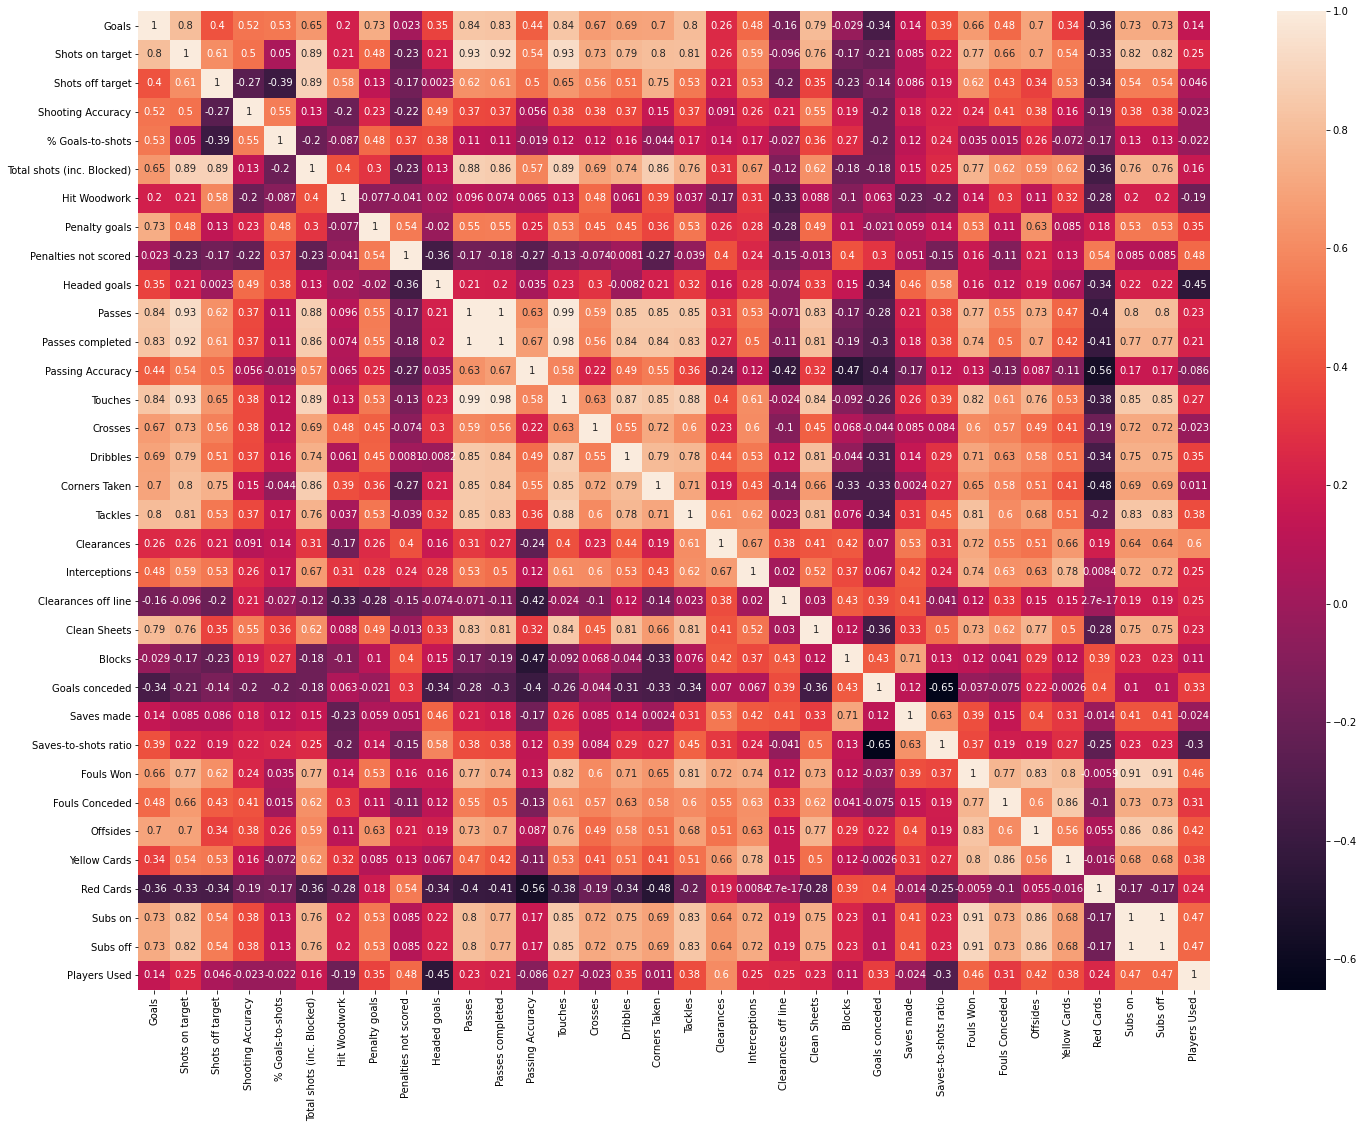

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,18))
sns.heatmap(df.corr(), annot=True)

In [5]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs = {'Column_A':[], 'Column_B':[]}
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs['Column_A'].append(cols[i])
            pairs['Column_B'].append(cols[j])
    return pairs

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    pairs = get_redundant_pairs(df)
    tuple_pairs = list(zip(pairs['Column_A'], pairs['Column_B']))

    au_corr = au_corr.drop(labels=tuple_pairs).sort_values(ascending=False)
    return pd.DataFrame(au_corr[0:n], columns=['Correlation'])

print("Top Absolute Correlations")
get_top_abs_correlations(df.loc[:, 'Goals':], 10)

Top Absolute Correlations


Correlation
Subs on                    Subs off             1.000000
Passes                     Passes completed     0.997697
                           Touches              0.993044
Passes completed           Touches              0.984324
Shots on target            Touches              0.934623
                           Passes               0.930337
                           Passes completed     0.923242
Fouls Won                  Subs on              0.907719
                           Subs off             0.907719
Total shots (inc. Blocked) Touches              0.894708

### Parte II ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [6]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
def get_RegModels(X, y, random_state=42, size=0.2, deg_start=2, deg_stop=10):
    models = ['Linear', 'Polynomial', 'SVR']
    data = {'Model':[], 'Type':[], 'Train_Score':[], 'Test_Score':[], 'Coef':[]}
    X = X.reshape(-1, 1)

    for model in models:

        if model == 'Linear':

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)
            m = LinearRegression()
            m.fit(X_train, y_train)
            data['Model'].append('Linear')
            data['Type'].append('Standard')
            data['Train_Score'].append(m.score(X_train, y_train))
            data['Test_Score'].append(m.score(X_test, y_test))
            data['Coef'].append(m.coef_)

            plt.scatter(X, y, color='royalblue')
            plt.plot(X_train, m.predict(X_train), color='firebrick')
            plt.title(f'Linear | Score: {m.score(X_train, y_train)}')
            plt.show()

        if model == 'Polynomial':

            for degree in range(deg_start, deg_stop+1):
                polinominal_model = PolynomialFeatures(degree) 
                X_poly = polinominal_model.fit_transform(X ,y)
                X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=size, random_state=random_state)

                lin_reg_model = LinearRegression()
                lin_reg_model.fit(X_train, y_train)
                y_pred_train = lin_reg_model.predict(X_train)
                train_score = r2_score(y_train, y_pred_train)
                y_pred_test = lin_reg_model.predict(X_test)
                test_score = r2_score(y_test, y_pred_test)

                data['Model'].append('Polynomial')
                data['Type'].append(f'Degree: {degree}')
                data['Train_Score'].append(train_score)
                data['Test_Score'].append(test_score)
                data['Coef'].append(lin_reg_model.coef_)

                y_prediction = lin_reg_model.predict(X_train)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)
                X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_prediction)))
                plt.scatter(X, y, color='royalblue')
                plt.plot(X_train_to_show, y_train_to_show, color='firebrick')
                plt.title(f'Polynomial Degree: {degree} | Score:{train_score}')
                plt.show()

        if model == 'SVR':

            scaler = StandardScaler()
            scaler.fit(X)
            X_scaled = scaler.transform(X)
            kernel = ['rbf', 'linear', 'poly']

            for k in kernel:
                svr = SVR(kernel=k)
                X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=size, random_state=random_state)

                svr_model = svr.fit(X_train, y_train)
                data['Model'].append(model)
                data['Type'].append(k)
                data['Train_Score'].append(svr_model.score(X_train, y_train))
                data['Test_Score'].append(svr_model.score(X_test, y_test))
                if k == 'linear':
                    data['Coef'].append(svr_model.coef_)
                else:
                    data['Coef'].append(0)

                y_prediction = svr_model.predict(X_train)
                X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_prediction)))
                plt.scatter(X_scaled, y, color='royalblue')
                plt.plot(X_train_to_show, y_train_to_show, color='firebrick')
                plt.title(f'SVR: {k} | Score:{svr_model.score(X_train, y_train)}')
                plt.show()

    return pd.DataFrame(data, index=range(len(data['Model'])))


In [8]:
X = np.array(df['Shooting Accuracy'])
y = np.array(df['Goals'])

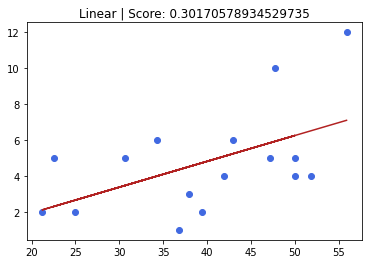

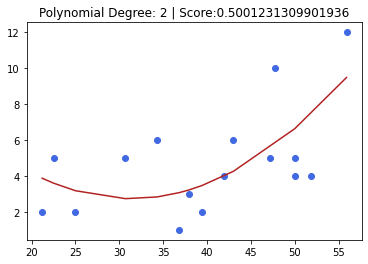

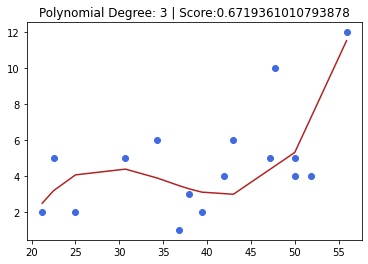

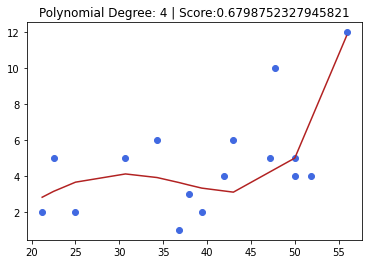

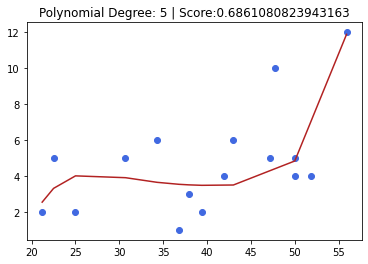

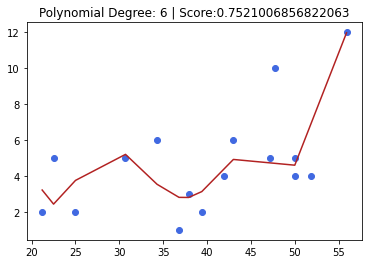

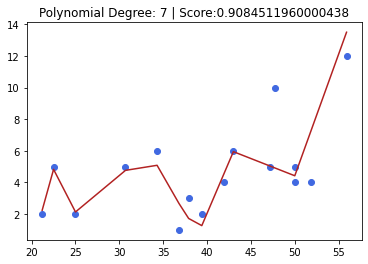

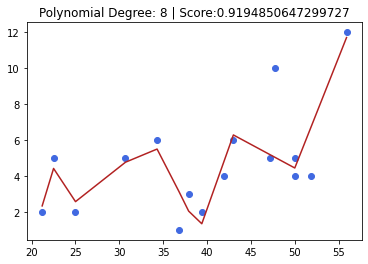

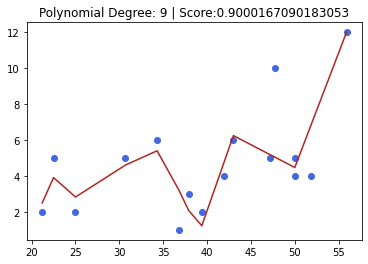

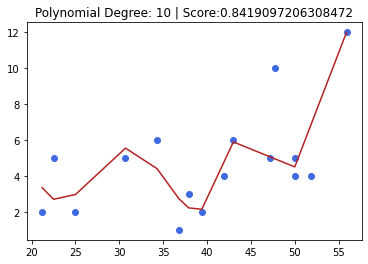

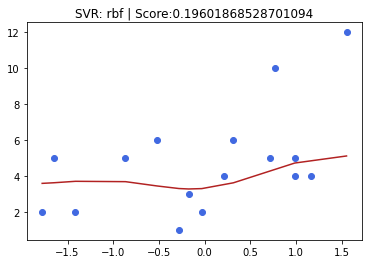

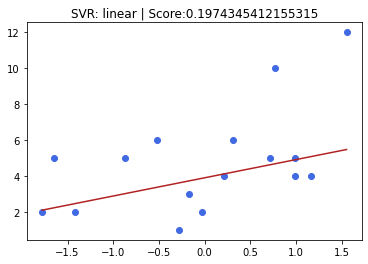

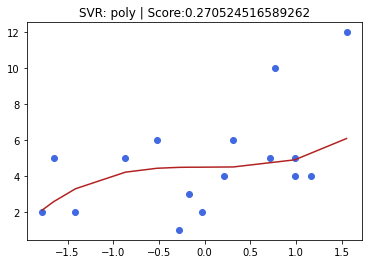

,Model,Type,Train_Score,Test_Score,Coef
0,Linear,Standard,0.301706,-0.001941,[0.14363339354829419]
1,Polynomial,Degree: 2,0.500123,-0.220921,"[0.0, -0.6990772543354329, 0.011162735079510377]"
2,Polynomial,Degree: 3,0.671936,-0.820066,"[0.0, 4.6991859954222654, -0.13793835761827428..."
3,Polynomial,Degree: 4,0.679875,-0.858677,"[0.0, -1.469359474934602, 0.11652624930045422,..."
4,Polynomial,Degree: 5,0.686108,-0.677833,"[0.0, 30.27862524249505, -1.6759028765100124, ..."
5,Polynomial,Degree: 6,0.752101,0.229218,"[0.0, -622.3899118974635, 45.56130353556932, -..."
6,Polynomial,Degree: 7,0.908451,-7.012838,"[0.0, 7752.472432139977, -690.9073836032429, 3..."
7,Polynomial,Degree: 8,0.919485,-15.792854,"[0.0, 13.127071231294591, 115.12367594234782, ..."
8,Polynomial,Degree: 9,0.900017,-27.051922,"[0.0, 0.11627067844794525, 0.285939851062378, ..."
9,Polynomial,Degree: 10,0.841910,-4.918690,"[0.0, 2.8180794240490703e-08, -8.9899992668248..."


In [9]:
get_RegModels(X, y)

### Parte III. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

* % de goles por disparo: 40%
* Total shots (inc. Blocked): 102
* Corners Taken: 5
* Passes: 82
* Dribbles: 23

In [10]:
X = np.array(df.loc[:, ['% Goals-to-shots', 'Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles']])
y = np.array(df['Goals'])

In [25]:
len(y)

16

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [55]:
def get_CatModels(X, y, random_state=42, size=0.2):
    trained = {}
    models = ['Logistic', 'RandomForest', 'SVC']
    data = {'Model':[], 'Type':[], 'Train_Score':[], 'Test_Score':[]}

    for model in models:

        if model == 'Logistic':

            m = LogisticRegression(max_iter=1000)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)
            m.fit(X_train, y_train)
            data['Model'].append('Linear')
            data['Type'].append('Standard')
            data['Train_Score'].append(m.score(X_train, y_train))
            data['Test_Score'].append(m.score(X_test, y_test))

            trained['Logistic'] = m

        if model == 'RandomForest':

            RFC = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)
            RFC.fit(X_train, y_train)
            train_score = RFC.score(X_train, y_train)
            test_score = RFC.score(X_test, y_test)

            data['Model'].append('RandomForestClassifier')
            data['Type'].append(f'Standard')
            data['Train_Score'].append(train_score)
            data['Test_Score'].append(test_score)

            trained['RandomForest'] = RFC

        if model == 'SVC':

            scaler = StandardScaler()
            scaler.fit(X)
            X_scaled = scaler.transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=size, random_state=random_state)
            kernel = ['rbf', 'linear', 'poly']

            for k in kernel:
                svc = SVC(kernel=k)

                svc_model = svc.fit(X_train, y_train)
                data['Model'].append(model)
                data['Type'].append(k)
                data['Train_Score'].append(svc_model.score(X_train, y_train))
                data['Test_Score'].append(svc_model.score(X_test, y_test))

                trained[f'SVC_{k}'] = svc_model


    return trained, pd.DataFrame(data, index=range(len(data['Model'])))

In [56]:
cmodels, cdf = get_CatModels(X, y)

C:\Users\jgnsa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
cmodels.keys()

dict_keys(['Logistic', 'RandomForest', 'SVC_rbf', 'SVC_linear', 'SVC_poly'])

In [58]:
cdf

,Model,Type,Train_Score,Test_Score
0,Linear,Standard,1.000000,0.00
1,RandomForestClassifier,Standard,1.000000,0.25
2,SVC,rbf,0.750000,0.25
3,SVC,linear,1.000000,0.25
4,SVC,poly,0.666667,0.00


In [61]:
vars1 = np.array([40, 102, 5, 82, 23]).reshape(1, -1)
print('Logistic Goal Prediction:',cmodels['Logistic'].predict(vars1))
print('RandomForest Goal Prediction:', cmodels['RandomForest'].predict(vars1))
print('SVC-rbf Goal Prediction:', cmodels['SVC_rbf'].predict(vars1))
print('SVC-linear Goal Prediction:', cmodels['SVC_linear'].predict(vars1))
print('SVC-poly Goal Prediction:', cmodels['SVC_poly'].predict(vars1))

Logistic Goal Prediction: [6]
RandomForest Goal Prediction: [4]
SVC-rbf Goal Prediction: [6]
SVC-linear Goal Prediction: [12]
SVC-poly Goal Prediction: [12]
